In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
book = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
user = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID', 'Location', 'Age']
rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixe

In [3]:
print rating['userID'].unique().shape[0]
print rating['ISBN'].unique().shape[0]

105283
340556


In [4]:
print 'Number of unique users is',rating['userID'].unique().shape[0]
print 'Number of unique book is',rating['ISBN'].unique().shape[0]

Number of unique users is 105283
Number of unique book is 340556


In [5]:
# rating['userID'].value_counts()

In [6]:
#check missing value
np.sum(rating.isnull())

userID        0
ISBN          0
bookRating    0
dtype: int64

In [7]:
np.sum(rating.duplicated())

0

In [8]:
rating2=rating.copy()

In [9]:
rating2.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
# rating2.groupby('userID')['bookRating'].mean().to_frame()

In [11]:
# rating2=rating2.merge(rating2.groupby('userID')['bookRating'].mean().to_frame().reset_index(),left_index=True,right_index=True,suffixes =['',' user_avg'],how='left')
# rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].mean().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_avg'],how='left')
# rating2=rating2.merge(rating2.groupby('userID')['bookRating'].count().to_frame().reset_index(),left_index=True,right_index=True,suffixes =['',' user_review_count'],how='left')
# rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].count().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_review_count'],how='left')

In [12]:
rating2=rating2.merge(rating2.groupby('userID')['bookRating'].mean().to_frame().reset_index(),left_on='userID',right_on='userID',suffixes =['',' user_avg'],how='left')
rating2=rating2.merge(rating2.groupby('userID')['bookRating'].count().to_frame().reset_index(),left_on='userID',right_on='userID',suffixes =['',' user_review_count'],how='left')

In [13]:
rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].mean().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_avg'],how='left')
rating2=rating2.merge(rating2.groupby('ISBN')['bookRating'].count().to_frame().reset_index(),left_on='ISBN',right_on='ISBN',suffixes =['',' book_review_count'],how='left')

In [14]:
rating2.shape

(1149780, 7)

In [15]:
rating2

,userID,ISBN,bookRating,bookRating user_avg,bookRating user_review_count,bookRating book_avg,bookRating book_review_count
0,276725,034545104X,0,0.000000,1,2.933333,60
1,276726,0155061224,5,5.000000,1,2.500000,2
2,276727,0446520802,0,0.000000,1,4.060345,116
3,276729,052165615X,3,4.500000,2,3.000000,1
4,276729,0521795028,6,4.500000,2,6.000000,1
5,276733,2080674722,0,0.000000,1,3.666667,3
6,276736,3257224281,8,8.000000,1,5.400000,5
7,276737,0600570967,6,6.000000,1,6.000000,1
8,276744,038550120X,7,7.000000,1,3.336957,184
9,276745,342310538,10,10.000000,1,5.000000,2


In [16]:
rating2.rename(columns={'bookRating user_avg':'user_avg'
                        ,'bookRating book_avg':'book_avg'
                       ,'bookRating user_review_count':'user_review_count'
                       ,'bookRating book_review_count':'book_review_count'}, inplace=True)

In [17]:
rating2

,userID,ISBN,bookRating,user_avg,user_review_count,book_avg,book_review_count
0,276725,034545104X,0,0.000000,1,2.933333,60
1,276726,0155061224,5,5.000000,1,2.500000,2
2,276727,0446520802,0,0.000000,1,4.060345,116
3,276729,052165615X,3,4.500000,2,3.000000,1
4,276729,0521795028,6,4.500000,2,6.000000,1
5,276733,2080674722,0,0.000000,1,3.666667,3
6,276736,3257224281,8,8.000000,1,5.400000,5
7,276737,0600570967,6,6.000000,1,6.000000,1
8,276744,038550120X,7,7.000000,1,3.336957,184
9,276745,342310538,10,10.000000,1,5.000000,2


In [18]:
rating2.shape

(1149780, 7)

In [19]:
rating.shape

(1149780, 3)

In [20]:
ldf=rating2

In [21]:
ldfu=ldf.groupby('userID')
ldfb=ldf.groupby('ISBN')
user_avg=ldfu.bookRating.mean()
user_review_count=ldfu.userID.count()
book_avg=ldfb.bookRating.mean()
book_review_count=ldfb.ISBN.count()
nldf=ldf.copy()
nldf.set_index(['ISBN'], inplace=True)
nldf['book_avg']=book_avg
nldf['book_review_count']=book_review_count
nldf.reset_index(inplace=True)
nldf.set_index(['userID'], inplace=True)
nldf['user_avg']=user_avg
nldf['user_review_count']=user_review_count
nldf.reset_index(inplace=True)

In [22]:
def recompute_frame(ldf):
    """
    takes a dataframe ldf, makes a copy of it, and returns the copy
    with all averages and review counts recomputed
    this is used when a frame is subsetted.
    """
    ldfu=ldf.groupby('userID')
    ldfb=ldf.groupby('ISBN')
    user_avg=ldfu.bookRating.mean()
    user_review_count=ldfu.userID.count()
    book_avg=ldfb.bookRating.mean()
    book_review_count=ldfb.ISBN.count()
    nldf=ldf.copy()
    nldf.set_index(['ISBN'], inplace=True)
    nldf['book_avg']=book_avg
    nldf['book_review_count']=book_review_count
    nldf.reset_index(inplace=True)
    nldf.set_index(['userID'], inplace=True)
    nldf['user_avg']=user_avg
    nldf['user_review_count']=user_review_count
    nldf.reset_index(inplace=True)
    return nldf

In [23]:
def make_smaller(df, bizcount, usercount):
    smallidf1=df[(df.book_review_count > bizcount)]
    smallidf1=recompute_frame(smallidf1)
    smallidf2=smallidf1[(smallidf1.user_review_count > usercount)]
    smalldf=recompute_frame(smallidf2)
    return smalldf

In [24]:
# rating2[rating2.book_review_count>100]

In [25]:
rating2.shape

(1149780, 7)

In [26]:
rating2['user_review_count'].quantile(np.arange(0,1,0.1))

0.0       1.0
0.1       4.0
0.2      15.0
0.3      38.0
0.4      82.0
0.5     157.0
0.6     277.0
0.7     478.0
0.8     952.0
0.9    1810.0
Name: user_review_count, dtype: float64

In [27]:
rating2['book_review_count'].quantile(np.arange(0,1,0.1))

0.0      1.0
0.1      1.0
0.2      2.0
0.3      3.0
0.4      5.0
0.5      8.0
0.6     14.0
0.7     26.0
0.8     52.0
0.9    124.0
Name: book_review_count, dtype: float64

In [28]:
rating['userID'].value_counts().quantile(np.arange(0,1,0.1))

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     1.0
0.6     2.0
0.7     3.0
0.8     5.0
0.9    12.0
Name: userID, dtype: float64

In [29]:
rating2.describe()

,userID,bookRating,user_avg,user_review_count,book_avg,book_review_count
count,1.149780e+06,1.149780e+06,1.149780e+06,1.149780e+06,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00,2.866950e+00,7.619198e+02,2.866950e+00,4.918527e+01
std,8.056228e+04,3.854184e+00,2.289588e+00,1.820991e+03,2.244484e+00,1.524487e+02
min,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.034500e+04,0.000000e+00,1.022652e+00,2.400000e+01,1.357143e+00,2.000000e+00
50%,1.410100e+05,0.000000e+00,2.394922e+00,1.570000e+02,2.733333e+00,8.000000e+00
75%,2.110280e+05,7.000000e+00,4.214286e+00,6.770000e+02,3.932642e+00,3.600000e+01
max,2.788540e+05,1.000000e+01,1.000000e+01,1.360200e+04,1.000000e+01,2.502000e+03


In [30]:
smalldf=make_smaller(rating2, 100, 10)
# smalldf.to_csv("rating2.csv", index=False)
# print "Number of Reviews",smalldf.shape[0]
# print "Number of Users", smalldf.user_id.unique().shape[0]
# print "Number of Businesses", smalldf.business_id.unique().shape[0]
# s,d=compute_supports(smalldf)

In [31]:
smalldf.shape

(77866, 7)

In [32]:
smalldf.head()

,userID,ISBN,bookRating,user_avg,user_review_count,book_avg,book_review_count
0,277195,0060391626,10,1.428571,21,2.562500,96
1,277195,0060502258,0,1.428571,21,2.901554,193
2,277195,0060987561,0,1.428571,21,2.857143,140
3,277195,0316666343,0,1.428571,21,3.604982,562
4,277195,0330332775,10,1.428571,21,3.428571,42


In [33]:
trainlist=[]
testlist=[]
validatelist=[]
take=5
for k, v in smalldf.groupby('userID'):
    if np.mean(v.user_review_count) > 12:
        takenos=np.random.choice(range(take), size=take/2, replace=False)
        takelist=np.array([e in takenos for e in range(take)])
        validatelist.append(v[-take:][~takelist])#use those 
        testlist.append(v[-take:][takelist])#use the other 
        trainlist.append(v[:-take])
    else:
        trainlist.append(v)
traindf=pd.concat(trainlist)
validatedf=pd.concat(validatelist)
testdf=pd.concat(testlist)
print traindf.shape, validatedf.shape, testdf.shape

(68231, 7) (5781, 7) (3854, 7)


In [34]:
maskval=[e in set(validatedf.ISBN).difference(set(traindf.ISBN)) for e in validatedf.ISBN] 
masktest=[e in set(testdf.ISBN).difference(set(traindf.ISBN)) for e in testdf.ISBN] 
print np.sum(maskval), np.sum(masktest)

0 0


In [35]:
smalldf.ISBN.value_counts().tail()

0451204530    41
0552124753    36
0671027344    35
0552998486    33
0091867770    30
Name: ISBN, dtype: int64

In [36]:
smalldf.userID.value_counts().tail()

2793      11
201042    11
188022    11
76888     11
124876    11
Name: userID, dtype: int64

In [37]:
ybar = traindf.bookRating.mean()
ybar

2.4641292081312014

In [38]:
uuids=traindf.userID.unique()#unique-user-ids
uiids=traindf.ISBN.unique()#unique-item-ids

In [39]:
uuidmap={v:k for k,v in enumerate(uuids)}#of length U
uiidmap={v:k for k,v in enumerate(uiids)}#of length M

In [40]:
def compute_supports(df):
    uuids=df.user_id.unique()
    rests = df.groupby('business_id').user_id.unique()
    bdict={}
    for e,v in zip(rests.index.values, rests.values):
        bdict[e] = np.array([item in v for item in uuids])
    restaurants=bdict.keys()
    supports=[]
    for i,rest1 in enumerate(restaurants):
        for j,rest2 in enumerate(restaurants):
            if  i < j:
                supmask = (bdict[rest1] & bdict[rest2])
                common_reviewers = np.sum(supmask)
                supports.append(common_reviewers)
    print "mean support",np.mean(supports), "median support", np.median(supports)
    return supports, bdict

In [45]:
def user_contrib(uids, trdf):
    return { uid:(trdf[trdf['userID']==uid].bookRating.mean() - ybar) for uid in uids }
def item_contrib(iids, trdf):
    return {iid:(trdf[trdf['ISBN']==iid].bookRating.mean() - ybar) for iid in iids}
user_biases=user_contrib(uuids, traindf)
item_biases=item_contrib(uiids, traindf)

(array([ 118.,   26.,   72.,   68.,   82.,   82.,   98.,   77.,   88.,
          79.,  109.,   82.,   75.,   94.,   76.,   96.,   75.,   71.,
          68.,   47.,   71.,   57.,   54.,   46.,   39.,   53.,   37.,
          41.,   30.,   22.,   29.,   26.,   23.,   20.,   12.,   17.,
          17.,   14.,   13.,   13.,   14.,   10.,    3.,    4.,    1.,
           8.,    5.,    1.,    2.,    2.]),
 array([-2.46412921, -2.26412921, -2.06412921, -1.86412921, -1.66412921,
        -1.46412921, -1.26412921, -1.06412921, -0.86412921, -0.66412921,
        -0.46412921, -0.26412921, -0.06412921,  0.13587079,  0.33587079,
         0.53587079,  0.73587079,  0.93587079,  1.13587079,  1.33587079,
         1.53587079,  1.73587079,  1.93587079,  2.13587079,  2.33587079,
         2.53587079,  2.73587079,  2.93587079,  3.13587079,  3.33587079,
         3.53587079,  3.73587079,  3.93587079,  4.13587079,  4.33587079,
         4.53587079,  4.73587079,  4.93587079,  5.13587079,  5.33587079,
         5.53587

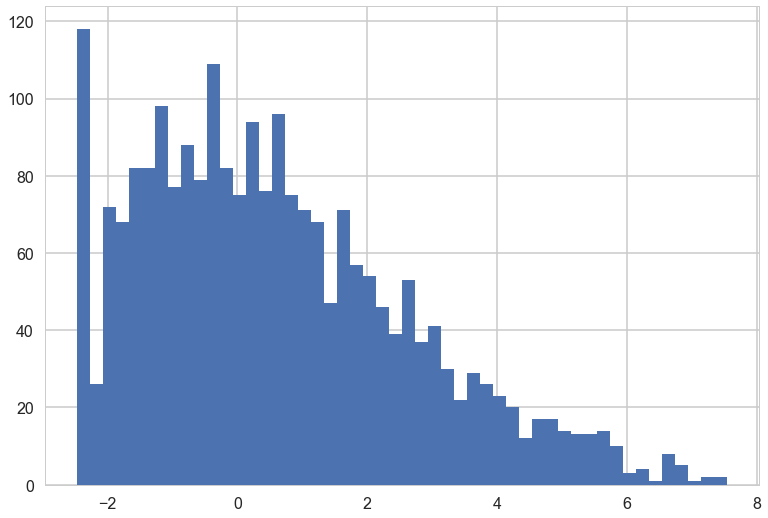

In [72]:
plt.hist(user_biases.values(),bins=50)

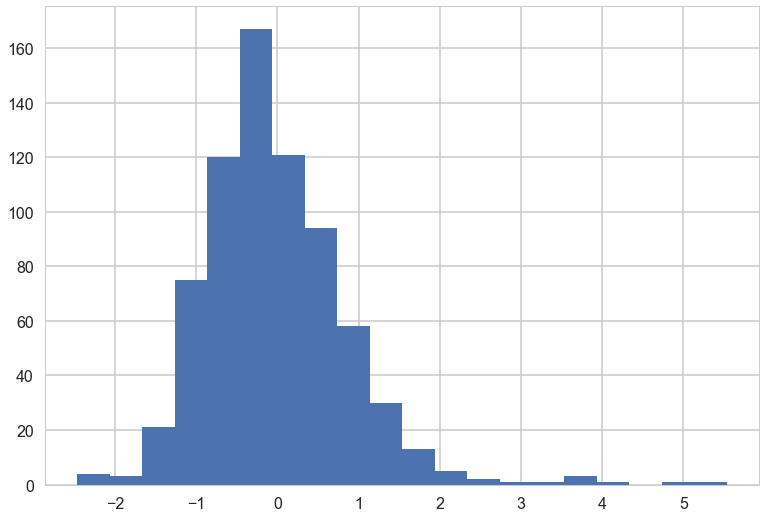

In [73]:
plt.hist(item_biases.values(), bins=20);

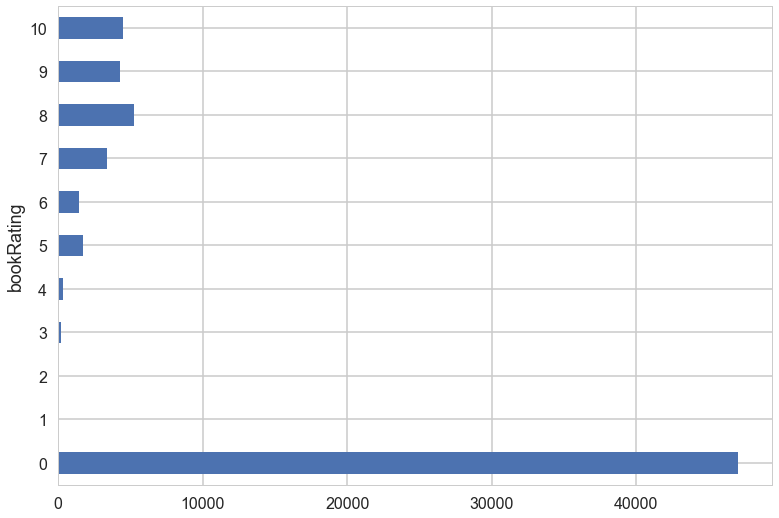

In [74]:
traindf.groupby('bookRating').bookRating.count().plot(kind="barh");

In [60]:
train_avgs={'mean':ybar, 'users':user_biases, 'items':item_biases}

In [62]:
predictions={}
predictions_valid={}

In [63]:
predictions['baseline'] = (ybar + testdf['userID'].apply(lambda x: user_biases[x]) + testdf['ISBN'].apply(lambda x: item_biases[x])).values
predictions_valid['baseline'] = (ybar + validatedf['userID'].apply(lambda x: user_biases[x]) + validatedf['ISBN'].apply(lambda x: item_biases[x])).values

In [65]:
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

In [75]:
def compare_results(stars_actual, stars_predicted, ylow=1, yhigh=6, model="", predicteds=False, onsame=False, axis=False):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    if onsame:
        ax=onsame
    elif axis:
        ax=axis
    else:
        fig=plt.figure()
        ax=plt.gca()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    xp=[]
    yp=[]
    for k,v in df.groupby('actual'):
        xp.append(k)
        yp.append(v.predicted.mean())        
    
    cl, = ax.plot(xp,yp, 's-', label="means for %s" % model)
    c=cl.get_color()

    sig=df.groupby('actual').predicted.std().values
    ax.fill_between(xp, yp - sig, yp + sig, 
                 color=c, alpha=0.2)
    if predicteds:
        ax.plot(df.actual, df.predicted, '.', color=c, alpha=0.1, label="predicted for %s" % model)

    if not onsame:
        ax.plot([1,10],[1,10], 'k', label="slope 1")
        ax.set_xlabel("actual")
        ax.set_ylabel("predicted")
        ax.set_ylim([ylow,yhigh])
        ax.set_xlim([0.9, 5.1])
    ax.legend(frameon=False, loc="upper left")
    rmse=get_rmse(stars_actual, stars_predicted)
    print "RMSE for %s" % model, rmse
    return ax,rmse

RMSE for baseline 3.77028691839


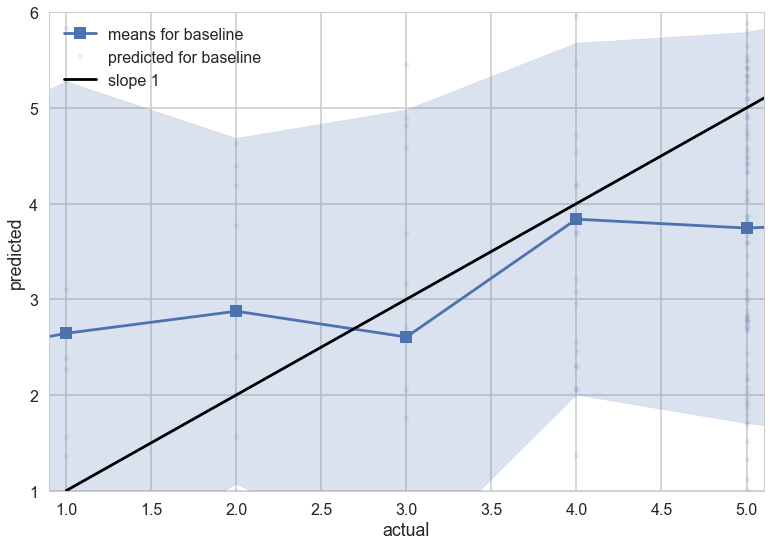

In [76]:
compare_results(testdf.bookRating,predictions['baseline'], model="baseline", predicteds=True);